<a href="https://colab.research.google.com/github/MCanhisares/DLStudies/blob/master/PyTorchForDLS4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear regression

In [0]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'x')

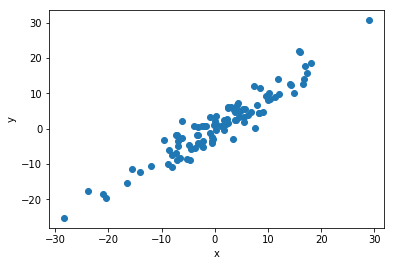

In [2]:
X = torch.randn(100,1) * 10
y = X + 3* torch.randn(100,1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

In [0]:
class LR(nn.Module):
  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)
  def forward(self,x):
    pred = self.linear(x)
    return pred

In [4]:
torch.manual_seed(1)
model = LR(1,1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [0]:
[w,b] = model.parameters()
def get_params():
  return (w[0][0].item(), b[0].item())

In [0]:
def plot_fit(title):
  plt.title = title
  w1,b1 = get_params()
  x1 = np.array([-30, 30])
  y1 = w1*x1+b1
  plt.plot(x1,y1, 'r')
  plt.scatter(X,y)
  plt.show()

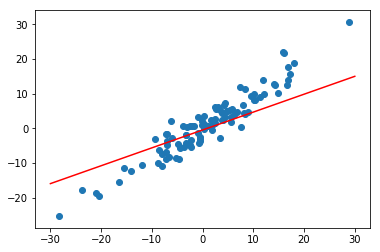

In [7]:
plot_fit('Initial model')

In [0]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) 

In [9]:
epochs = 100
losses = []
for i in range(epochs):
  y_pred = model.forward(X)
  loss = criterion(y_pred, y)
  print(f'epoch: {i}, loss: {loss.item()}')
  
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0, loss: 23.277795791625977
epoch: 1, loss: 19.022327423095703
epoch: 2, loss: 15.9910249710083
epoch: 3, loss: 13.83020305633545
epoch: 4, loss: 12.288444519042969
epoch: 5, loss: 11.186986923217773
epoch: 6, loss: 10.398752212524414
epoch: 7, loss: 9.833388328552246
epoch: 8, loss: 9.426661491394043
epoch: 9, loss: 9.132894515991211
epoch: 10, loss: 8.919612884521484
epoch: 11, loss: 8.76371955871582
epoch: 12, loss: 8.648791313171387
epoch: 13, loss: 8.563145637512207
epoch: 14, loss: 8.4984712600708
epoch: 15, loss: 8.448851585388184
epoch: 16, loss: 8.410078048706055
epoch: 17, loss: 8.379152297973633
epoch: 18, loss: 8.353935241699219
epoch: 19, loss: 8.332904815673828
epoch: 20, loss: 8.314970970153809
epoch: 21, loss: 8.299355506896973
epoch: 22, loss: 8.28549861907959
epoch: 23, loss: 8.273001670837402
epoch: 24, loss: 8.261574745178223
epoch: 25, loss: 8.251007080078125
epoch: 26, loss: 8.241146087646484
epoch: 27, loss: 8.231879234313965
epoch: 28, loss: 8.22312355041

Text(0.5, 0, 'epoch')

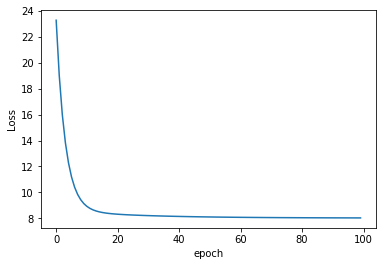

In [10]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

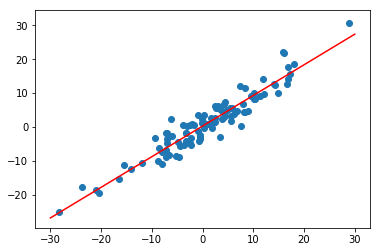

In [11]:
plot_fit('Trained Model')